# Prueba técnica para Tinsa

En el presente documento analizaremos los datos facilitados desde una perspectiva temporal y relacional, estableciendo en un primer momento una imagen general de la evolución de las principales variables, para luego indagar más en las posibles conexiones y relaciones de tipo causal que puedan establecerse entre unas y otras. Finalmente se llevará a cabo una previsión a futuro de una de estas variables clave del mercado inmobiliario en base a un sencillo modelo econométrico. La idea de este informe es trazar una conexión lógica entre los datos y narrar de manera coherente un relato analítico sobre qué ha pasado con el mercado inmobiliario a lo largo de estos cuatro periodos y qué podemos esperar en el periodo cinco.  

### 1.0 Evolución temporal del valor de la vivienda

In [16]:
.libPaths()

[1] "C:/Users/jaime/anaconda3/Lib/R/library"

In [17]:
library(plm)


Warning message:
"package 'plm' was built under R version 4.1.3"

ERROR: Error: package or namespace load failed for 'plm' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'collapse' 1.5.3 is being loaded, but >= 1.8.9 is required


In [18]:
library(ggplot2)


Warning message:
"package 'ggplot2' was built under R version 4.1.2"

In [19]:
library(lubridate)


Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



In [20]:
library(openxlsx)


Warning message:
"package 'openxlsx' was built under R version 3.6.3"

In [21]:
library(tidyverse)


Warning message:
"package 'tidyverse' was built under R version 4.1.2"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 4.1.2"Warning message:
"package 'forcats' was built under R version 4.1.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x lubridate::date()        masks base::date()
x dplyr::filter()          masks stats::filter()
x lubridate::intersect()

In [32]:
library(hrbrthemes)


Warning message:
"package 'hrbrthemes' was built under R version 4.1.3"

ERROR: Error: package or namespace load failed for 'hrbrthemes' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'xfun' 0.22 is being loaded, but >= 0.27 is required


In [23]:
library(ggimage)


Warning message:
"package 'ggimage' was built under R version 4.1.2"

In [24]:
library(png)

In [25]:
getwd()

[1] "C:/Users/jaime/Prueba Tinsa"

In [26]:
datos<-read.xlsx("test.xlsx", sheet= "datos")


In [28]:
datos<-datos %>% mutate(MES2 = if_else(MES == "ene", "jan",
                                       if_else(MES == "feb", "feb",
                                               if_else(MES == "mar", "mar",
                                                       if_else(MES == "abr", "apr",
                                                               if_else(MES == "may", "may",
                                                                       if_else(MES == "jun", "jun",
                                                                               if_else(MES == "jul", "jul",
                                                                                       if_else(MES == "ago", "aug",
                                                                                               if_else(MES == "sep", "sep",
                                                                                                       if_else(MES == "oct", "oct",
                                                                                                               if_else(MES == "nov", "nov",
                                                                                                                       if_else(MES == "dic", "dec","NA")))))))))))))



In [29]:


datos<-datos %>%
    mutate(Fecha = paste(MES2,AÑO)) %>%
    mutate(Fecha = str_replace_all(Fecha, " ", "-0"))


datos$fecha2 <-  dmy(paste0("01-", datos$Fecha), quiet = TRUE)

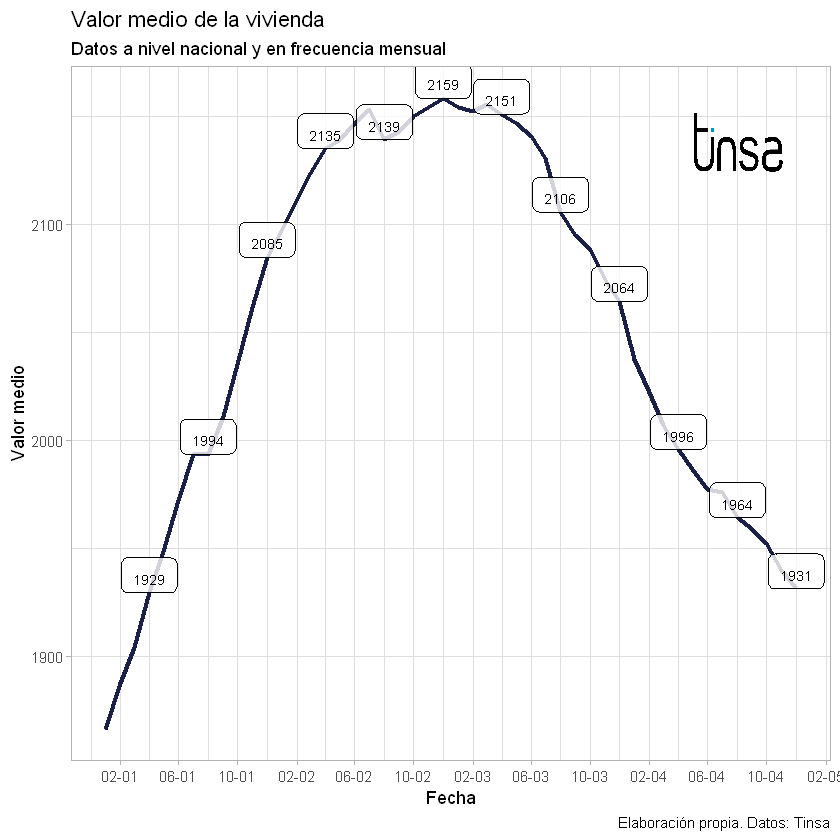

In [36]:
logo_path <- "Logotipo-Tinsa.png"

logo <- readPNG(logo_path)

# Grafico 1 - Serie temporal del valor medio de la vivienda

ggplot(datos, aes(x = fecha2, y = VIVIENDA_VALORM2_PAIS_MEDIA,group = 1)) +
  geom_line(size = 1.3, color = "#1B2048") +
  geom_label(data = subset(datos, as.numeric(format(fecha2, "%m")) %% 4 == 0),aes(label = round(VIVIENDA_VALORM2_PAIS_MEDIA)), vjust = 0, hjust = 0.5, size = 3, label.padding = unit(0.5, "lines"), label.r = unit(0.3, "lines"),
             fill = "white", color = "black", alpha = 0.8) +
  scale_x_date(date_labels = "%m-%y", date_breaks = "4 month")+
  labs(x = "Fecha", y = "Valor medio", title = "Valor medio de la vivienda",subtitle = "Datos a nivel nacional y en frecuencia mensual" ,caption = "Elaboración propia. Datos: Tinsa") +
  annotation_raster(logo, xmin = as.Date("2004-04-01"), xmax = as.Date("2004-12-01"), 
                    ymin = max(datos$VIVIENDA_VALORM2_PAIS_MEDIA), ymax = max(datos$VIVIENDA_VALORM2_PAIS_MEDIA) - 40)+
  
  theme_light()

Como podemos observar, el valor medio de la vivienda ha presentado una evolución positiva desde el periodo 0 hasta enero del periodo 3, donde alcanzó un valor máximo de 2159 euros. A partir de este momento, la serie sufre un declive significativo hasta alcanzar niveles de junio de 1. Un alza tan significativa, mostrando una progresión creciente y constante seguida de una caída tan pronunciada a partir de un periodo temporal concreto parece indicarnos la existencia de un shock idiosincrático o el fin de un posible proceso explosivo de precios de naturaleza burbujística. 

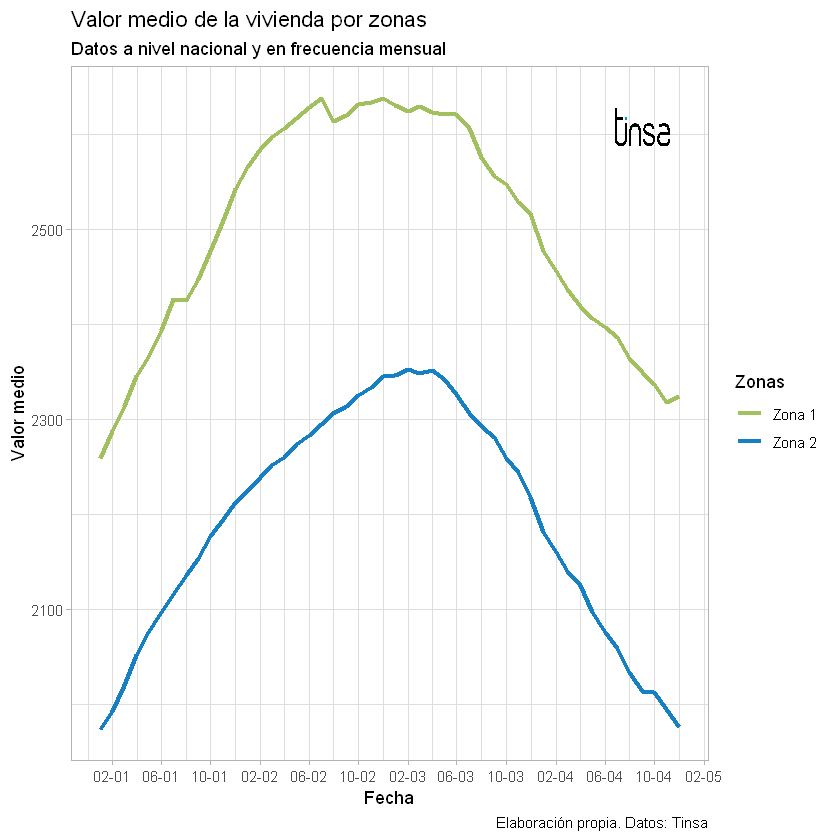

In [37]:

ggplot(datos, aes(x = fecha2)) +
  geom_line(aes(y = VIVIENDA_VALORM2_ZONA1_MEDIA, color = "Zona 1"), size = 1.3) +
  geom_line(aes(y = VIVIENDA_VALORM2_ZONA2_MEDIA, color = "Zona 2"), size = 1.3) +
  scale_x_date(date_labels = "%m-%y", date_breaks = "4 month")+
  scale_color_manual(values = c("Zona 1" = "#A3C061", "Zona 2" = "#1780C2"), labels = c("Zona 1", "Zona 2"))+
  labs(x = "Fecha", y = "Valor medio", title = "Valor medio de la vivienda por zonas",subtitle = "Datos a nivel nacional y en frecuencia mensual", color = "Zonas"
       ,caption = "Elaboración propia. Datos: Tinsa") +
  theme(legend.position = "top")+
  annotation_raster(logo, xmin = as.Date("2004-06-01"), xmax = as.Date("2004-12-01"), 
                    ymin = max(datos$VIVIENDA_VALORM2_ZONA1_MEDIA), ymax = max(datos$VIVIENDA_VALORM2_ZONA1_MEDIA) - 60)+
  theme_light()

Esta tendencia parece ser común a todos los segmentos del parque de vivienda de nuestro escenario. Tanto en la Zona 1 (donde la vivienda goza de un valor medio superior) como en la Zona 2 (con un valor medio menor), la serie sigue una tendencia alcista hasta alcanzar máximos en el periodo 3. Si bien, la vivienda en Zona 1 presenta una característica interesante en contraste con el comportamiento de la vivienda en Zona 2. Por un lado, la vivienda en Zona 1 se ve impactada por el shock previamente mencionado unos seis meses antes que en el caso de la de la Zona 2. Muestra, por lo tanto, una evolución adelantada fruto de, posiblemente, un comportamiento directamente relacionado con las fuentes del shock del periodo 3. Por ejemplo, un porcentaje del total de esta vivienda puede estar empleándose como un activo especulativo, siendo más vulnerable a potenciales cambios en variables financieras (por ejemplo, los tipos de interés de política monetaria).  

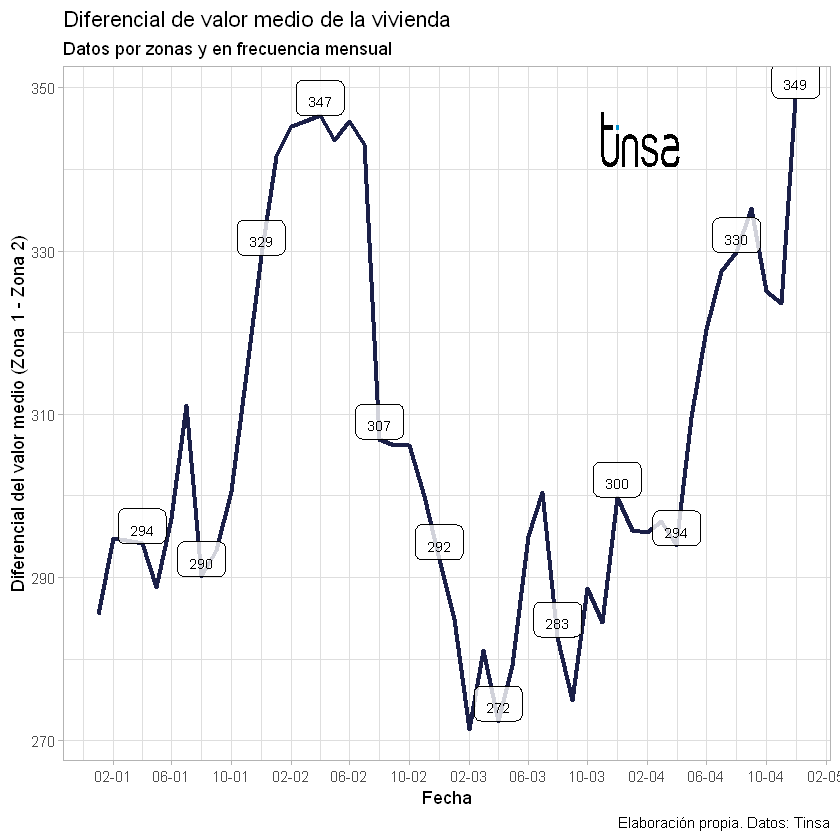

In [38]:

datos<- datos %>% mutate(diferencial_zonas = VIVIENDA_VALORM2_ZONA1_MEDIA-VIVIENDA_VALORM2_ZONA2_MEDIA,
                         diferencial_zonas_porcentaje = diferencial_zonas/VIVIENDA_VALORM2_ZONA2_MEDIA*100,
                         inflacion_zona1= c(NA,diff(VIVIENDA_VALORM2_ZONA1_MEDIA) / VIVIENDA_VALORM2_ZONA1_MEDIA[-length(datos$VIVIENDA_VALORM2_ZONA1_MEDIA)])*100,
                         inflacion_zona2= c(NA,diff(VIVIENDA_VALORM2_ZONA2_MEDIA) / VIVIENDA_VALORM2_ZONA1_MEDIA[-length(datos$VIVIENDA_VALORM2_ZONA2_MEDIA)])*100)



ggplot(datos, aes(x = fecha2, y = diferencial_zonas,group = 1)) +
  geom_line(size = 1.3, color = "#1B2048") +
  geom_label(data = subset(datos, as.numeric(format(fecha2, "%m")) %% 4 == 0),aes(label = round(diferencial_zonas)), vjust = 0, hjust = 0.5, size = 3, label.padding = unit(0.5, "lines"), label.r = unit(0.3, "lines"),
             fill = "white", color = "black", alpha = 0.8) +
  scale_x_date(date_labels = "%m-%y", date_breaks = "4 month")+
  labs(x = "Fecha", y = "Diferencial del valor medio (Zona 1 - Zona 2)", title = "Diferencial de valor medio de la vivienda",subtitle = "Datos por zonas y en frecuencia mensual",
       caption = "Elaboración propia. Datos: Tinsa") +
  annotation_raster(logo, xmin = as.Date("2003-10-01"), xmax = as.Date("2004-5-01"), 
                    ymin = max(datos$diferencial_zonas), ymax = max(datos$diferencial_zonas) - 10)+
  
  theme_light()

Esto último es lo que se observa en la serie una vez que se calcula la diferencia contemporánea en el valor medio de la vivienda en la Zona 1 y en la Zona 2. La volatilidad de la serie confirma una divergencia entre ambas magnitudes en periodos de crecimiento, así como convergencia en periodos de decrecimiento. Zona 1 reacciona de manera más volátil a la tendencia, lo que parece indicar o una mayor preferencia por parte de los consumidores o un comportamiento de tipo especulativo. 

Warning message:
"Removed 1 rows containing missing values (geom_bar)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."

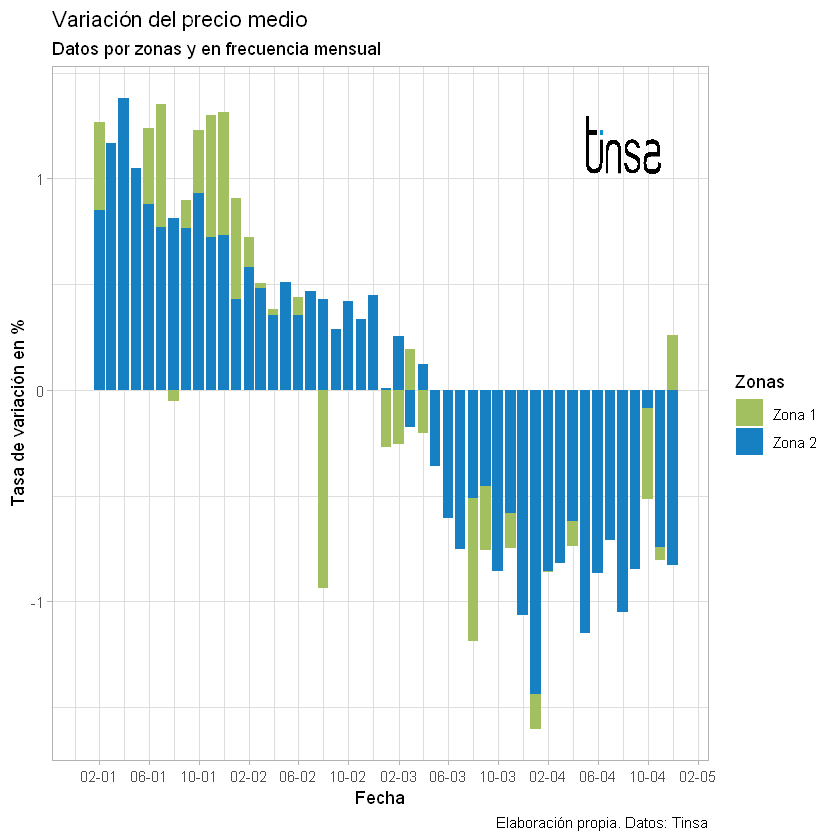

In [41]:
ggplot(datos, aes(x = fecha2)) +
  geom_bar(aes(y = inflacion_zona1, fill = "Zona 1"), stat = "identity", position = "dodge") +
  geom_bar(aes(y = inflacion_zona2, fill = "Zona 2"), stat = "identity", position = "dodge") +
  scale_x_date(date_labels = "%m-%y", date_breaks = "4 month")+
  scale_fill_manual(values = c("Zona 1" = "#A3C061", "Zona 2" = "#1780C2"), labels = c("Zona 1", "Zona 2"))+
  labs(x = "Fecha", y = "Tasa de variación en %", title = "Variación del precio medio",subtitle = "Datos por zonas y en frecuencia mensual", fill = "Zonas",
       caption = "Elaboración propia. Datos: Tinsa") +
  theme(legend.position = "top")+
  annotation_raster(logo, xmin = as.Date("2004-04-01"), xmax = as.Date("2004-12-01"), 
                    ymin = max(datos$inflacion_zona1, na.rm=T), ymax = max(datos$inflacion_zona1, na.rm=T) - 0.4)+
  theme_light()


### 2.0 La compraventa de vivienda y las hipotecas

Las tasas de variación ofrecen otro punto de vista que confirma el diagnóstico que realizamos en las líneas superiores. Se pone en evidencia, además, el carácter adelantado al ciclo que presenta el valor medio de la vivienda en Zona 1. Mientras que Zona 2 aún se encuentra en un periodo de evolución estancada o plana a principios del periodo 3, Zona 1 ya ha confirmado esta tendencia y ya está inmersa en una “recesión”. 

Warning message:
"Removed 12 rows containing missing values (position_stack)."Warning message:
"Removed 12 rows containing missing values (position_stack)."

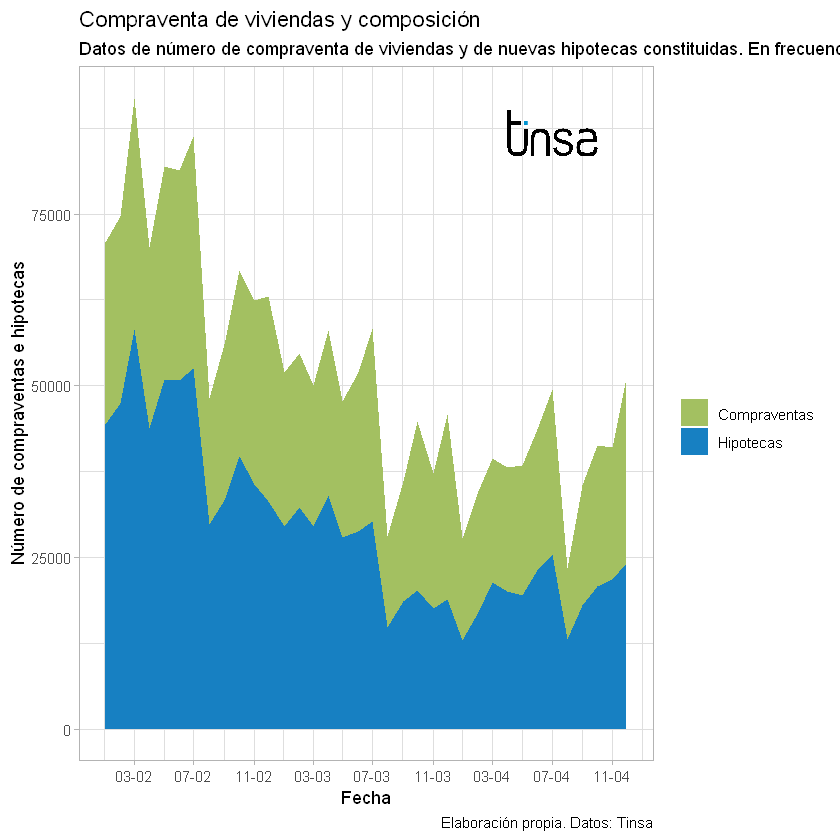

In [43]:

ggplot(datos, aes(x = fecha2)) +
  geom_area(aes(y = NUM_COMPRAVENTAS_VIVIENDA, fill = "Compraventas"), position = "stack") +
  geom_area(aes(y = NUM_HIPOTECAS, fill = "Hipotecas"), position = "stack") +
  scale_x_date(date_labels = "%m-%y", date_breaks = "4 month")+
  scale_fill_manual(values = c("Compraventas" = "#A3C061", "Hipotecas" = "#1780C2"), labels = c("Compraventas", "Hipotecas"))+
  labs(x = "Fecha", y = "Número de compraventas e hipotecas", title = "Compraventa de viviendas y composición",subtitle = "Datos de número de compraventa de viviendas y de nuevas hipotecas constituidas. En frecuencia mensual", fill = "", 
       caption = "Elaboración propia. Datos: Tinsa") +
  theme(legend.position = "top")+
  annotation_raster(logo, xmin = as.Date("2004-03-01"), xmax = as.Date("2004-11-01"), 
                    ymin = max(datos$NUM_COMPRAVENTAS_VIVIENDA, na.rm=T), ymax = max(datos$NUM_COMPRAVENTAS_VIVIENDA, na.rm=T) - 10000)+
  theme_light()


Si acudimos de nuevo a los valores agregados de la serie, observamos que las compraventas de vivienda se encuentran, en términos absolutos, en decrecimiento desde mucho antes que suceda el cambio de tendencia en el valor medio de la vivienda. Es a partir de mayo o junio del periodo 7 cuando parece impactar un schock negativo, sumado a la presencia de estacionalidad en la serie a partir de los meses de verano. Por otro lado, las hipotecas presentan un comportamiento menos volátil y pronunciado, siendo, además, el factor que parece explicar un mayor porcentaje de la serie de compraventas. Entonces, según los datos, una gran parte de la compraventa de vivienda se realiza mediante la petición de créditos hipotecarios, normalmente asociados a la compra de vivienda con objeto residencial. Esto sería coherente con la caracterización que hemos hecho de la Zona 1 y la Zona 2. La volatilidad de la compraventa no financiada vía hipotecas podría estar relacionado con la evolución más volátil del valor medio de la vivienda en Zona 1. 

Warning message:
"Removed 12 row(s) containing missing values (geom_path)."Warning message:
"Removed 12 rows containing missing values (geom_point)."Warning message:
"Removed 12 rows containing missing values (geom_label)."

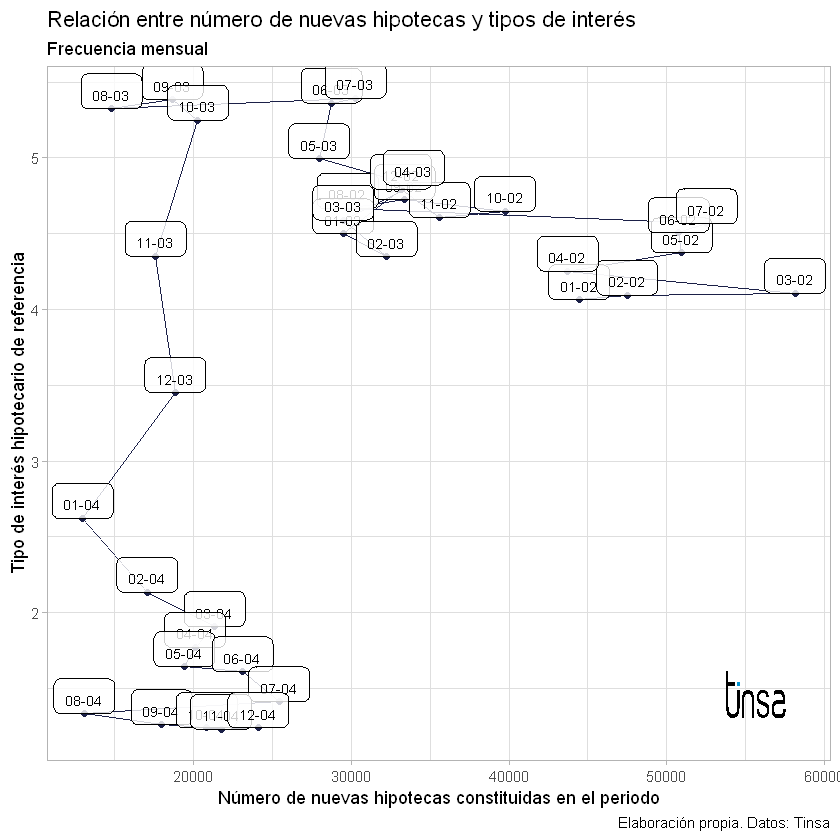

In [60]:

ggplot(datos, aes(x = NUM_HIPOTECAS, y = TIPO_INTERES)) +
  geom_path(color ="#1B2048") +
  geom_point(color ="#1B2048") +
  geom_label(aes(label = format(fecha2, "%m-%y")), vjust = 0, hjust = 0.5, size = 3, label.padding = unit(0.5, "lines"), label.r = unit(0.3, "lines"),
             fill = "white", color = "black", alpha = 0.8) +
  # ggrepel::geom_text_repel(aes(label = fecha2))+
  ggtitle("Relación entre número de nuevas hipotecas y tipos de interés") +
  labs(x="Número de nuevas hipotecas constituidas en el periodo", y="Tipo de interés hipotecario de referencia", subtitle = "Frecuencia mensual",
       caption = "Elaboración propia. Datos: Tinsa") +
  annotation_raster(logo, xmin = max(datos$NUM_HIPOTECAS, na.rm=T), xmax = max(datos$NUM_HIPOTECAS, na.rm=T) - 5000, 
                    ymin = min(datos$TIPO_INTERES, na.rm=T), ymax = max(datos$TIPO_INTERES, na.rm=T) - 3.7)+
  theme_light()

Si ahora comparamos el principal precio por el que se indexan las hipotecas, el tipo de interés de referencia, con la con el número de nuevas concesiones de estas en cada periodo, observamos que no hay una relación clara entre ambas variables. 

In [53]:
library(lattice)

ERROR: Error: This is R 3.6.1, package 'lattice' needs >= 4.0.0


`geom_smooth()` using formula 'y ~ x'
Warning message:
"Computation failed in `stat_smooth()`:
object 'palette.colors' is not exported by 'namespace:grDevices'"

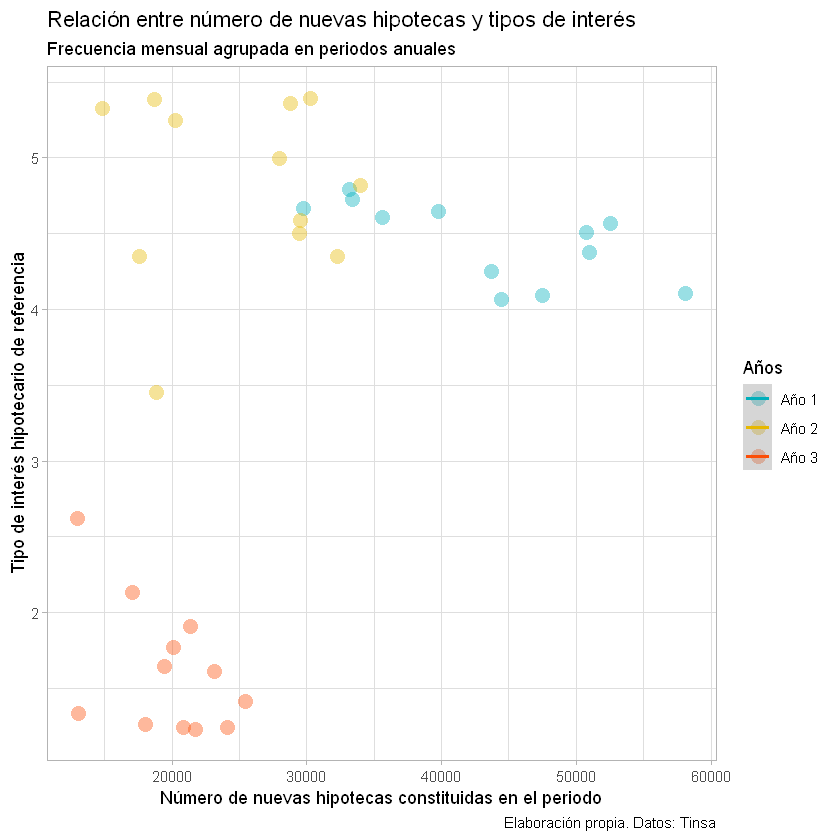

In [61]:

datos2<-datos

colnames(datos2)[colnames(datos2) == "AÑO"] <- "ANO"


datos2 <- datos2%>% filter(!is.na(NUM_HIPOTECAS) ) 

datos2$ANO<-as.factor(datos2$ANO)


ggplot(datos2, aes(x = NUM_HIPOTECAS, y = as.numeric(TIPO_INTERES))) +
  # geom_path() +
  geom_point(shape = 16, size = 4,alpha = .4,aes(color=ANO)) +
  # geom_text_repel(aes(label = fecha2))+
  geom_smooth(aes(color = ANO, fill = ANO), method = "lm") +
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07","#01AFBB"),  name="Años",  labels=c("Año 1", "Año 2", "Año 3", "Año 4"))+
  scale_fill_manual(values = c( "#E7B800", "#FC4E07","#01AFBB"),  name="",  labels=c("Año 2", "Año 3", "Año 4"))+
  ggtitle("Relación entre número de nuevas hipotecas y tipos de interés") +
  labs(x="Número de nuevas hipotecas constituidas en el periodo", y="Tipo de interés hipotecario de referencia", subtitle = "Frecuencia mensual agrupada en periodos anuales",
       caption = "Elaboración propia. Datos: Tinsa") +
  theme_light()


No obstante, esta desconexión desaparece cuando controlamos los datos por periodos. Como podemos observar, si existe una correlación de tipo negativa entre el número de compraventas y los tipos de interés de referencia de las hipotecas, lo que era de esperar. Unos créditos hipotecarios que exijan un retorno superior desincentivarán la compra de vivienda y, por lo tanto, podrá afectar negativamente al valor medio de las mismas. Únicamente en el periodo 2 esta relación lineal parece ser más difusa, lo que coincide con el inicio del cambio de tendencia del que hablamos cuando observábamos la serie temporal de valor medio. 

### 3.0 Previsión a 12 meses de la evolución de las hipotecas

In [55]:
library(stats)

Una vez nos hemos hecho una idea general de la situación del mercado inmobiliario en nuestra base de datos y tomando como referencia los conceptos que hemos desarrollado durante este estudio, podemos tratar de realizar una sencilla previsión de como podemos estimar que va a evolucionar la concesión de nuevas hipotecas. Valiéndonos de la teoría económica y de nuestra observación empírica, hacemos uso de la variable de los tipos de interés de referencia de las hipotecas para desarrollar un sencillo modelo econométrico que nos permitirá apuntar tendencias futuras en este sentido. 



Call:
lm(formula = NUM_HIPOTECAS ~ TIPO_INTERES_Lag, data = datos3)

Residuals:
     Min       1Q   Median       3Q      Max 
-16030.7  -3601.6   -294.6   4482.1  13574.3 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         87524       7166  12.214 5.51e-14 ***
TIPO_INTERES_Lag   -13724       1669  -8.221 1.36e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7148 on 34 degrees of freedom
Multiple R-squared:  0.6653,	Adjusted R-squared:  0.6555 
F-statistic: 67.59 on 1 and 34 DF,  p-value: 1.362e-09


Warning message:
"Removed 12 row(s) containing missing values (geom_path)."

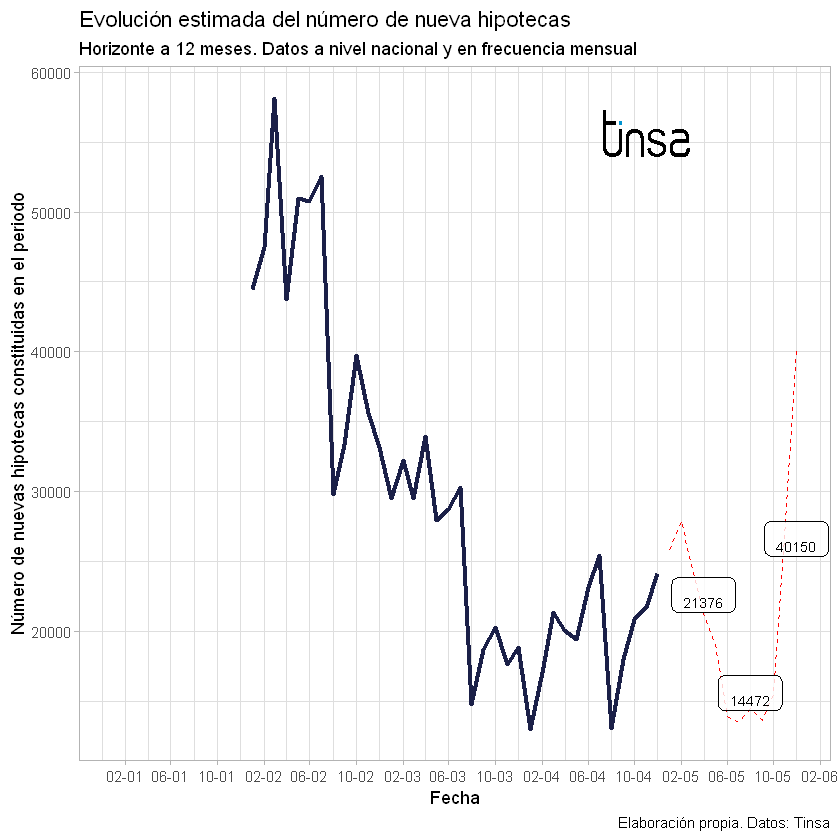

In [57]:

missing_data <- datos %>% filter(AÑO == 4)

datos$TIPO_INTERES_Lag <- lag(datos$TIPO_INTERES, n = 12)

observed_data <- datos[!is.na(datos$TIPO_INTERES_Lag), ]

datos3 <- datos%>% filter(!is.na(NUM_HIPOTECAS) ) 

model <- lm(NUM_HIPOTECAS ~ TIPO_INTERES_Lag, data = datos3)

summary(model)


missing_data$AÑO[missing_data$AÑO == 4]<-5

missing_data<-missing_data %>%
  mutate(Fecha = paste(MES2,AÑO)) %>%
  mutate(Fecha = str_replace_all(Fecha, " ", "-0"))


missing_data$fecha2 <-  dmy(paste0("01-", missing_data$Fecha), quiet = TRUE)

missing_data$VALORES_PRED <- predict(model, newdata = missing_data)



ggplot(datos, aes(x = fecha2, y = NUM_HIPOTECAS)) +
  geom_line(size = 1.3, color = "#1B2048") +
  geom_line(data = missing_data, aes(y = VALORES_PRED), color = "red", linetype = "dashed") +
  geom_label(data = subset(missing_data, as.numeric(format(fecha2, "%m")) %% 4 == 0),aes(label = round(VALORES_PRED)), vjust = -0.5, hjust = 0.5, size = 3, label.padding = unit(0.5, "lines"), label.r = unit(0.3, "lines"),
             fill = "white", color = "black", alpha = 0.8) +
  scale_x_date(date_labels = "%m-%y", date_breaks = "4 month")+
  labs(x = "Fecha", y = "Número de nuevas hipotecas constituidas en el periodo", title = "Evolución estimada del número de nueva hipotecas",subtitle = "Horizonte a 12 meses. Datos a nivel nacional y en frecuencia mensual",
       caption = "Elaboración propia. Datos: Tinsa") +
  annotation_raster(logo, xmin = as.Date("2004-06-01"), xmax = as.Date("2005-04-01"), 
                    ymin = max(datos$NUM_HIPOTECAS, na.rm = T), ymax = max(datos$NUM_HIPOTECAS, na.rm = T)  - 5000)+
  
  theme_light()


Considerando que los tipos de interés de las hipotecas afectan con un lag de 12 meses a la variable que mide la concesión de nuevas hipotecas en el periodo, podemos diseñar una regresión lineal entre ambas variables aplicándole un retardo al tipo de interés. Los resultados arrojan que, de manera significativa, un aumento de 1 punto en los tipos de interés produce una reducción de 13.724 nuevas hipotecas en el mercado. Si consideramos que esta relación es constante en el tiempo e imputamos los valores e los tipos de intererés de las hipotecas en el periodo 4 (que, como hemos visto, afectarán a la concesión de las nuevas hipotecas en el periodo 5), observamos que, tras la caída estacional asociada a los meses de verano, el número de nuevas hipotecas repuntará de manera muy significativa hasta alcanzar niveles de junio del periodo 2. 